In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
dataset = pd.read_csv('mydata.csv',sep=";",header=None)
print(dataset.shape)


(14980, 15)


In [3]:
dataset.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0


In [4]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.257405,4416.435832,0.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.191600,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,276.410000,1366.150000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,1.000000


In [5]:
dataset=np.array(dataset)

verisetini iki parçaya ayırdı, biz traindata yı kullanarak elde ettiğimiz sonuçları testdata ile confusion matrix ile kıyaslayıp yorum yapacağız

In [6]:
traindata, testdata = train_test_split(dataset, test_size=0.35) 

clf kısmında svm çalışıp optimal hyperplane nin katsayılarını buldu.

clf.fit te traindata nın ilk 14 kolonu ile sonuncu kolonu arasında fit etti.

predicte, svm in içinde tahmin eden kodu çalıştırıp, testdata nın ilk 14 kolonunu kullanarak son kolonu tahmin etti

confusion da ise testdata nın gerçek son kolonu ile tahmin edilen son kolonu compare etti.

In [7]:
clf = svm.SVC(kernel='linear', C = 1,gamma=0.05)
clf.fit(traindata[:,:14],traindata[:,14])
predict=clf.predict(testdata[:,:14])

[[2245  640]
 [1227 1131]]


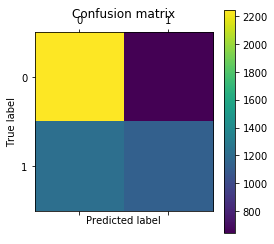

             precision    recall  f1-score   support

        0.0       0.65      0.78      0.71      2885
        1.0       0.64      0.48      0.55      2358

avg / total       0.64      0.64      0.64      5243



In [8]:
cm=confusion_matrix(testdata[:,14],predict)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print(classification_report(testdata[:,14],predict))

$\begin{pmatrix}tn & fp \\fn & tp \end{pmatrix}$

The precision is the ratio $ \frac{tp}{tp+fp} $ where tp is the number of true positives and fp the number of false positives.

The best value is 1 and the worst value is 0.

The recalll is ability of the classifier to find all the positive samples. the ratio is that $ \frac{tp}{tp+fn} $

The f1score is a weighted harmonic mean of precision and recall.

The last line gives a weighted average of precision, recall and f1-score where the weights are the support values.